In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
from matplotlib import pyplot as plt

from datetime import datetime

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('C:/Users/...crypto_data.csv')

In [ ]:
df

,Date,Currency,High,Low,Open,Close,Volume,Adj Close
0,2020-11-11,BTC,15916.260742,15290.006836,15290.909180,15701.339844,29772374934,15701.339844
1,2020-11-12,BTC,16305.003906,15534.771484,15701.298828,16276.343750,34175758344,16276.343750
2,2020-11-13,BTC,16463.177734,15992.152344,16276.440430,16317.808594,31599492172,16317.808594
3,2020-11-14,BTC,16317.808594,15749.193359,16317.808594,16068.138672,27481710135,16068.138672
4,2020-11-15,BTC,16123.110352,15793.534180,16068.139648,15955.587891,23653867583,15955.587891
...,...,...,...,...,...,...,...,...
10975,2021-11-07,BAT,1.029937,0.983037,1.011181,0.998702,176330170,0.998702
10976,2021-11-08,BAT,1.284604,0.966619,0.999954,1.269590,1110155762,1.269590
10977,2021-11-09,BAT,1.388955,1.163942,1.278406,1.167353,1555806451,1.167353
10978,2021-11-10,BAT,1.184452,1.021467,1.169313,1.083310,678737190,1.083310


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10980 non-null  object 
 1   Currency   10980 non-null  object 
 2   High       10980 non-null  float64
 3   Low        10980 non-null  float64
 4   Open       10980 non-null  float64
 5   Close      10980 non-null  float64
 6   Volume     10980 non-null  int64  
 7   Adj Close  10980 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 686.4+ KB


In [ ]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x))

In [ ]:
df[0:366]

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-11-11,15916.260742,15290.006836,15290.909180,15701.339844,29772374934,15701.339844
1,2020-11-12,16305.003906,15534.771484,15701.298828,16276.343750,34175758344,16276.343750
2,2020-11-13,16463.177734,15992.152344,16276.440430,16317.808594,31599492172,16317.808594
3,2020-11-14,16317.808594,15749.193359,16317.808594,16068.138672,27481710135,16068.138672
4,2020-11-15,16123.110352,15793.534180,16068.139648,15955.587891,23653867583,15955.587891
...,...,...,...,...,...,...,...
361,2021-11-07,63326.988281,61432.488281,61554.921875,63326.988281,24726754302,63326.988281
362,2021-11-08,67673.742188,63344.066406,63344.066406,67566.828125,41125608330,67566.828125
363,2021-11-09,68530.335938,66382.062500,67549.734375,66971.828125,42357991721,66971.828125
364,2021-11-10,68789.625000,63208.113281,66953.335938,64995.230469,48730828378,64995.230469


In [ ]:
df = df.drop(columns = 'Currency')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

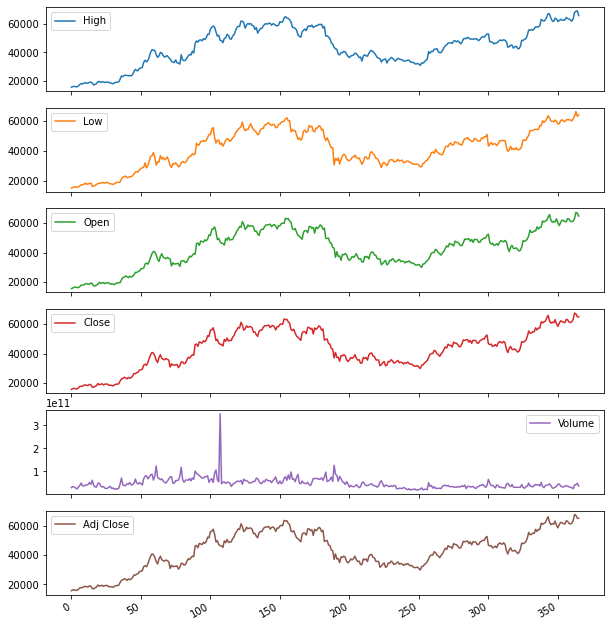

In [ ]:
df.drop(columns = 'Date')[0:366].plot(subplots=True, figsize=(10,12))

In [ ]:
#Попробуем сделать прогноз для значений столбца High валюты BTC, идентично можно сделать и для других значений валют
y = df[0:366]
y.info()
y = y[['Date', 'High']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       366 non-null    datetime64[ns]
 1   High       366 non-null    float64       
 2   Low        366 non-null    float64       
 3   Open       366 non-null    float64       
 4   Close      366 non-null    float64       
 5   Volume     366 non-null    int64         
 6   Adj Close  366 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 20.1 KB


In [ ]:
y.set_index('Date', inplace=True)
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-11-11 to 2021-11-11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [ ]:
y

,High
Date,
2020-11-11,15916.260742
2020-11-12,16305.003906
2020-11-13,16463.177734
2020-11-14,16317.808594
2020-11-15,16123.110352
...,...
2021-11-07,63326.988281
2021-11-08,67673.742188
2021-11-09,68530.335938


In [ ]:
#Я решила спользовать модель ARMA, но посмотреть, как влияют параметры p и q на инф. критерий aic
from statsmodels.tsa.arima_model import ARMA

mod_1 = ARMA(y, order=(1,0))
res_1 = mod_1.fit()
print("The AIC for an AR(1) is: ", res_1.aic)

mod_2 = ARMA(y, order=(0,1))
res_2 = mod_2.fit()
print("The AIC for an AR(2) is: ", res_2.aic)

mod_3 = ARMA(y, order=(1,1))
res_3 = mod_3.fit()
print("The AIC for an AR(3) is: ", res_3.aic)

C:\Users\Aurora\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Aurora\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D w

The AIC for an AR(1) is:  6440.292594362911
The AIC for an AR(2) is:  7560.935654697456


C:\Users\Aurora\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


The AIC for an AR(3) is:  6439.455414227011


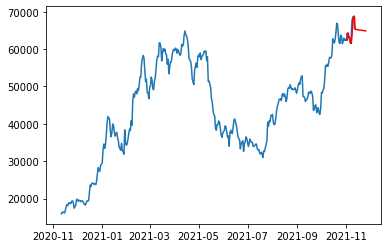

In [ ]:
#Поскольку 3-я модель с параметрами p=1 и q=1 дала наименьший fic, для предсказания используем ее
plt.plot(y)
plt.plot(res_3.predict(start = '2021-11-01', end = '2021-11-25'), color='red')

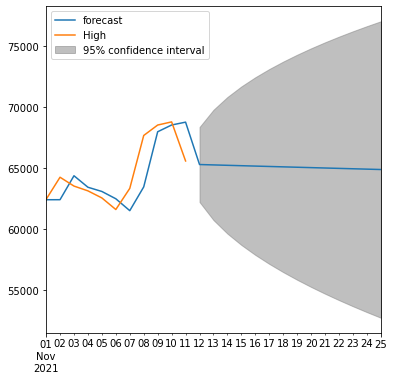

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
fig = res_3.plot_predict(start = '2021-11-01', end = '2021-11-25', ax=ax)
legend = ax.legend(loc='upper left')